In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
pos = np.random.randint(1, high=100, size=20).reshape(10,2)

pos-=[50,50]

In [35]:
pos.astype(float)

array([[  6.,  15.],
       [ -5.,  21.],
       [-47., -31.],
       [ 34., -48.],
       [-24.,  -3.],
       [ 10., -37.],
       [  8.,  36.],
       [ -2.,  19.],
       [  6.,   4.],
       [ 33.,  43.]])

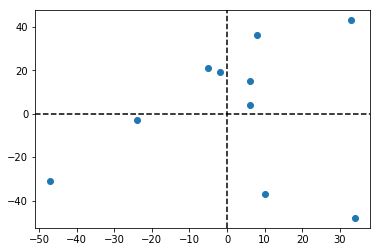

In [15]:
plt.plot(pos[:,0], pos[:,1], 'o')
plt.axhline(y=0, ls='--', color='k')
plt.axvline(x=0, ls='--', color='k')

In [16]:
dist = np.sqrt(pos[:,0]**2 + pos[:,1]**2)

In [17]:
dist

array([ 16.15549442,  21.58703314,  56.30275304,  58.82176468,
        24.18677324,  38.32753579,  36.87817783,  19.10497317,
         7.21110255,  54.20332093])

In [60]:
angle = np.rad2deg(np.arctan(np.abs(pos[:,1])/np.abs(pos[:,0]).astype(float)))

In [61]:
angle

array([ 68.19859051,  76.60750225,  33.40782459,  54.68878656,
         7.12501635,  74.87599269,  77.47119229,  83.99099404,
        33.69006753,  52.49585764])

In [23]:
np.linalg.norm(pos[0,:])

16.15549442140351

In [24]:
viewing_distance = 100

In [26]:
np.rad2deg(np.arctan(dist[0]/100))

9.1771237089524806

In [27]:
np.rad2deg(np.arctan(dist[0]/95))

9.6512659671634378

In [31]:
for i in range(30):
    print np.rad2deg(np.arctan(dist[0]/(100-5*i)))

9.17712370895
9.65126596716
10.1765274101
10.7615416176
11.4169737583
12.156145051
12.9958976965
13.9578127646
15.0699557496
16.3694263043
17.9061577505
19.7486956581
21.9931597963
24.7773649405
28.3031961004
32.8713437644
38.9304011595
47.1240113334
58.2431361407
72.8031099612
90.0
-72.8031099612
-58.2431361407
-47.1240113334
-38.9304011595
-32.8713437644
-28.3031961004
-24.7773649405
-21.9931597963
-19.7486956581


/Users/saskiad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


In [29]:
temp = np.empty((20))
for i in range(20):
    temp[i] = np.rad2deg(np.arctan(dist[0]/(100-5*i)))

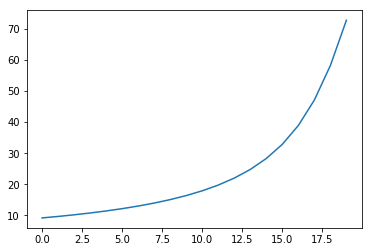

In [30]:
plt.plot(temp)

In [ ]:
#each position
#distance from center
#angle from center
#increase angle from center
#increase distance from center
#apply to angle from center


In [43]:
new_ang = np.rad2deg(np.arctan(dist/(100-5*1)))

In [44]:
new_ang

array([  9.65126597,  12.80204323,  30.65354994,  31.76481706,
        14.28390232,  21.97150095,  21.2157813 ,  11.37079523,
         4.34078896,  29.70740677])

In [47]:
new_dist = 100*np.tan(np.deg2rad(new_ang))

In [48]:
new_dist

array([ 17.0057836 ,  22.72319278,  59.26605583,  61.91764703,
        25.45976131,  40.34477452,  38.81913456,  20.11049808,
         7.59063426,  57.0561273 ])

In [66]:
new_pos = np.empty((10,2))
new_pos[:,0] = new_dist*np.cos(np.deg2rad(angle))
new_pos[:,1] = new_dist*np.sin(np.deg2rad(angle))
new_pos *= np.sign(pos)

In [67]:
new_pos

array([[  6.31578947,  15.78947368],
       [ -5.26315789,  22.10526316],
       [-49.47368421, -32.63157895],
       [ 35.78947368, -50.52631579],
       [-25.26315789,  -3.15789474],
       [ 10.52631579, -38.94736842],
       [  8.42105263,  37.89473684],
       [ -2.10526316,  20.        ],
       [  6.31578947,   4.21052632],
       [ 34.73684211,  45.26315789]])

In [53]:
pos

array([[  6,  15],
       [ -5,  21],
       [-47, -31],
       [ 34, -48],
       [-24,  -3],
       [ 10, -37],
       [  8,  36],
       [ -2,  19],
       [  6,   4],
       [ 33,  43]])

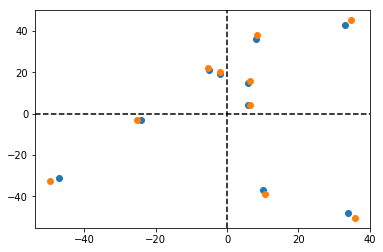

In [68]:
plt.plot(pos[:,0], pos[:,1], 'o')
plt.plot(new_pos[:,0], new_pos[:,1], 'o')
plt.axhline(y=0, ls='--', color='k')
plt.axvline(x=0, ls='--', color='k')

## 20 timesteps with interactive viewer

In [ ]:
pos = np.random.randint(1, high=100, size=20).reshape(10,2)

pos-=[50,50]

In [69]:
pos_array = np.empty((10,2,20))
pos_array[:,:,0] = pos.copy()

In [73]:
sign = np.sign(pos)
dist = np.sqrt(pos[:,0]**2 + pos[:,1]**2)
angle = np.arctan(np.abs(pos[:,1])/np.abs(pos[:,0]).astype(float))
for i in range(1,20):
    new_ang = np.arctan(dist/(100-5*i))
    new_dist = 100*np.tan(new_ang)
    pos_array[:,0,i] = new_dist*np.cos(angle)
    pos_array[:,1,i] = new_dist*np.sin(angle)
    pos_array[:,:,i] *= sign
    


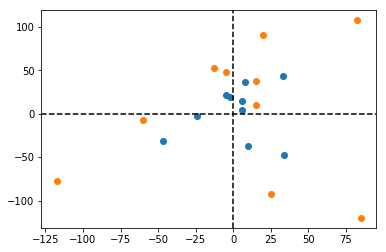

In [86]:
tp = 12
plt.plot(pos_array[:,0,0], pos_array[:,1,0], 'o')
plt.plot(pos_array[:,0,tp], pos_array[:,1,tp], 'o')
plt.axhline(y=0, ls='--', color='k')
plt.axvline(x=0, ls='--', color='k')

In [87]:
from ipywidgets import widgets, interact, interactive
from IPython.display import display
from IPython.display import Image

In [94]:
def f(x):
    plt.plot(pos_array[:,0,0], pos_array[:,1,0], 'o')
    plt.plot(pos_array[:,0,x], pos_array[:,1,x], 'o')
    plt.axhline(y=0, ls='--', color='k')
    plt.axvline(x=0, ls='--', color='k')
    plt.xlim(-100,100)
    plt.ylim(-100,100)
    
interact(f, x=(0,20,1));

A Jupyter Widget